# Analysing Gun Deaths

In this project we will be analysing gun deaths in the U.S.

The dataset came from [FiveThirtyEight](https://www.fivethirtyeight.com/), and can be found [here](https://github.com/fivethirtyeight/guns-data). The dataset is stored in the **`guns.csv`** file. It contains information on gun deaths in the US from **`2012`** to **`2014`**. Each row in the dataset represents a single fatality. The columns contain demographic and other information about the victim. 

This analysis is part of an assigment project at [Dataquest.io](http://www.dataquest.io)

# Objective

In this project, we'll explore the dataset, and try to find patterns in the demographics of the victims. Our first step is to read the data in and take a look at it.

In [112]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [113]:
data = pd.read_csv("guns.csv")
data.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


As we can see above, the first row of the data is a header row, which tells you what kind of data is in each column of the CSV file. Each row contains information about the fatality, and the victim. Here's an explanation of each column:

- **`Unnamed: 0`** - this is an identifier column, which contains the row number. It's common in CSV files to include a unique identifier for each row, but we can ignore it in this analysis.

- **`year`** - the year in which the fatality occurred.

- **`month`** - the month in which the fatality occurred.

- **`intent`** - the intent of the perpetrator of the crime. This can be **`Suicide`**, **`Accidental`**, **`NA`**, **`Homicide`**, or **`Undetermined`**.

- **`police`** - whether a police officer was involved with the shooting. Either **`0`** (false) or **`1`** (true).

- **`sex`** - the gender of the victim. Either **`M`** or **`F`**.

- **`race`** - he race of the victim. Either **`Asian/Pacific Islander`**, **`Native American/Native Alaskan`**, **`Black`**, **`Hispanic`**, or **`White`**.

- **`hispanic`** - a code indicating the Hispanic origin of the victim.

- **`place`** - where the shooting occurred.

- **`education`** - educational status of the victim. Can be one of the following:
       - 1 - Less than High School
       - 2 - Graduated from High School or equivalent
       - 3 - Some College
       - 4 - At least graduated from College
       - 5 - Not available

In [114]:
# We can drop the 'Unnamed: 0' column
cleaned_data = data.drop("Unnamed: 0", axis=1)
cleaned_data = cleaned_data.dropna()
cleaned_data["education"] = cleaned_data["education"].astype(int)
cleaned_data.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4
1,2012,1,Suicide,0,F,21.0,White,100,Street,3
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4
3,2012,2,Suicide,0,M,64.0,White,100,Home,4
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2


How many Gun Deaths occurred by year?

In [115]:
df_yearly = cleaned_data.groupby("year").agg({
        "year": 'count'
    })
df_yearly.columns = ["count"]
df_yearly.head(20)

,count
year,
2012,33072
2013,33146
2014,33125


We can see that about 33,100 death occured in each year.

Do more deaths happen in a certain month of the year?

In [116]:
# Group data by year and month to visualise
df_monthly = cleaned_data.groupby(["year", "month"]).agg({
        "year": 'count'
    })
df_monthly.columns = ['count']
df_monthly

count
year month       
2012 1       2720
     2       2321
     3       2703
     4       2759
     5       2967
     6       2775
     7       2965
     8       2909
     9       2812
     10      2701
     11      2689
     12      2751
2013 1       2816
     2       2347
     3       2820
     4       2754
     5       2755
     6       2876
     7       3041
     8       2816
     9       2705
     10      2762
     11      2722
     12      2732
2014 1       2617
     2       2338
     3       2644
     4       2815
     5       2816
     6       2881
     7       2841
     8       2918
     9       2881
     10      2833
     11      2719
     12      2822

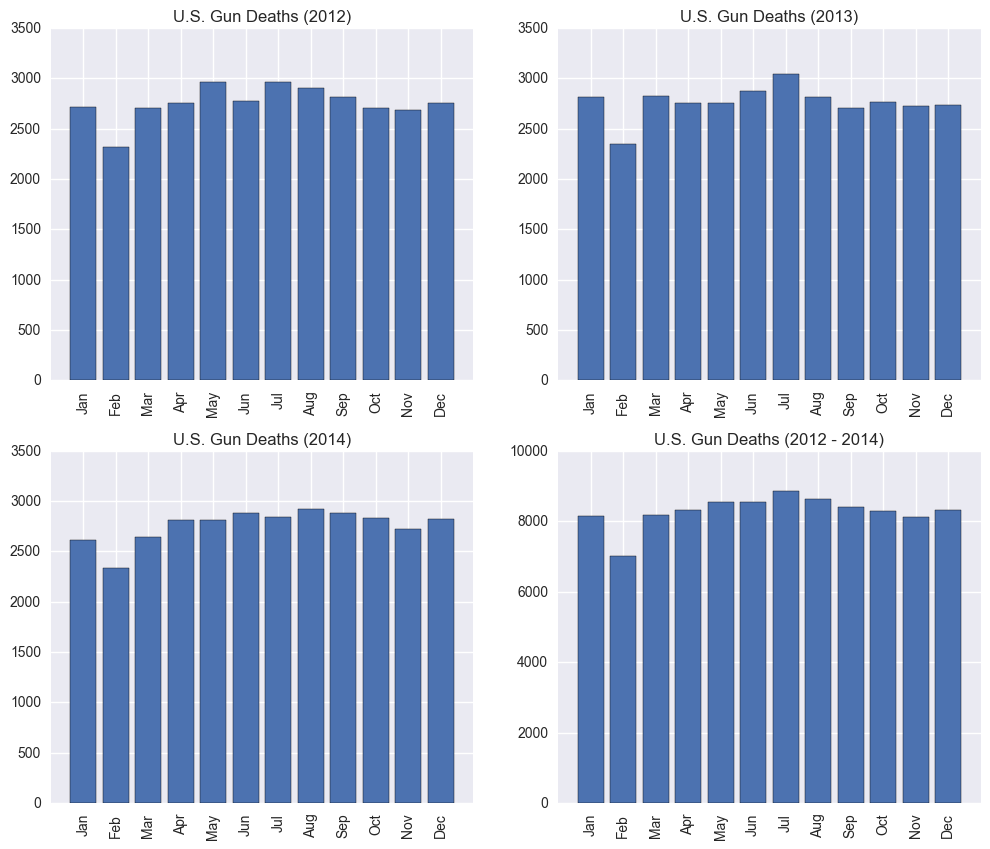

In [117]:
# Let' visualise the table above:
years = cleaned_data["year"].unique()
fig = plt.figure(figsize=(12, 10))

# Month labels
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Subplots for each year
for i, year in enumerate(years):
    df_year = df_monthly.loc[year, :]
    ax = fig.add_subplot(2, round(len(years)/2), i+1)
    ax.bar(list(df_year.index), df_year["count"], align='center')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_labels, rotation=90)
    ax.set_xlim(0, 13)
    ax.set_ylim(0, 3500)
    ax.set_title("U.S. Gun Deaths ({})".format(year))

df_monthly_all = cleaned_data.groupby("month").agg({
        "year": 'count'
    })
df_monthly_all.columns = ['count']

# Sub-plot for all years
ax = fig.add_subplot(2, round(len(years)/2), i+2)
ax.bar(list(df_monthly_all.index), df_monthly_all["count"], align='center')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels, rotation=90)
ax.set_xlim(0, 13)
ax.set_ylim(0, 10000)
ax.set_title("U.S. Gun Deaths ({} - {})".format(min(years), max(years)))
    
plt.show()

Apart from February when Gun Deaths are lower, in most other months Gun Deaths vary between 2500 and 3000 deaths.

Let us next examine Gun Deaths by race and sex.

In [118]:
# Looking at unique race values in the data set
unique_race = sorted(cleaned_data["race"].unique())
unique_race

['Asian/Pacific Islander',
 'Black',
 'Hispanic',
 'Native American/Native Alaskan',
 'White']

In [119]:
df_sex_race = cleaned_data.groupby(["race", "sex"]).agg({"race": "count"})
df_sex_race.columns = ["count"]
df_sex_race

count
race                           sex       
Asian/Pacific Islander         F      242
                               M     1052
Black                          F     2294
                               M    20628
Hispanic                       F     1062
                               M     7672
Native American/Native Alaskan F      125
                               M      764
White                          F    10641
                               M    54863

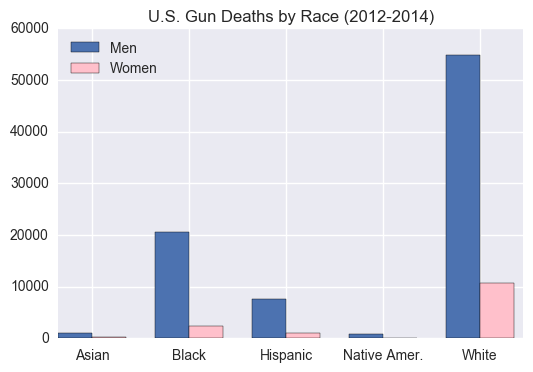

In [120]:
# Let's visualise the table above
multi_index = list(df_sex_race.index)
female_counts = []
male_counts = []
for i, race in enumerate(unique_race):
    female_counts.append(df_sex_race.loc[race, "F"].values[0])
    male_counts.append(df_sex_race.loc[race, "M"].values[0])

x_vals = pd.Series(range(0, len(unique_race)))
bar_width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x_vals, male_counts, bar_width)
rects2 = ax.bar(x_vals + bar_width, female_counts, bar_width, color='pink')
ax.set_xlim(0, 4.8)
ax.set_xticks(x_vals + bar_width)
ax.set_title("U.S. Gun Deaths by Race ({}-{})".format(min(years), max(years)))
ax.set_xticklabels(['Asian', 'Black', 'Hispanic', 'Native Amer.', 'White'], rotation=0)
ax.legend((rects1[0], rects2[0]), ('Men', 'Women'), loc='upper left')
plt.show()

From the above graph, it is difficult to visualize deaths in terms of absolute numbers. This is because if the population for a particular race is itself low, then the number of deaths will also be low.

To normalise this, we must get deaths per **`100,000`** people from each race.

For this, we read the second data-set.

In [121]:
census = pd.read_csv("census.csv")
census.head()

,Id,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
0,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


From the table above we can calculate the population of the various races, so that we can normalise:

- **Asian/Pacific Islander** --> Race Alone - Asian **+** Race Alone Native Hawaiian and Other Pacific Islander.
- **Black** --> Race Alone - Black or African American.
- **Hispanic** --> Race Alone - Hispanic
- **Native American/Native Alaskan** --> Race Alone - American Indian and Alaska Native
- **White** --> Race Alone - White

In [122]:
race_counts = []
asian_count = list(census["Race Alone - Asian"] + census["Race Alone - Native Hawaiian and Other Pacific Islander"])[0]
race_counts.append(asian_count)
black_count = list(census["Race Alone - Black or African American"])[0]
race_counts.append(black_count)
hispanic_count = list(census["Race Alone - Hispanic"])[0]
race_counts.append(hispanic_count)
native_count = list(census["Race Alone - American Indian and Alaska Native"])[0]
race_counts.append(native_count)
white_count = list(census["Race Alone - White"])[0]
race_counts.append(white_count)
race_counts

[15834141, 40250635, 44618105, 3739506, 197318956]

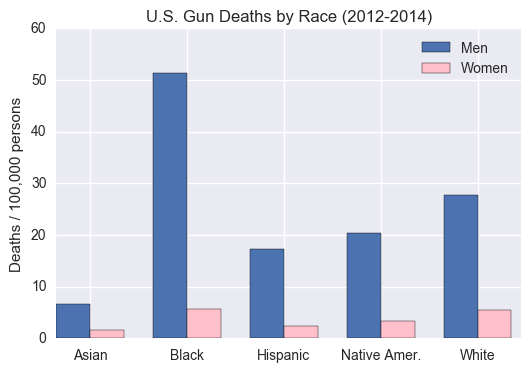

In [124]:
female_counts_norm = list(pd.Series(female_counts) * 100000 / pd.Series(race_counts))
male_counts_norm = list(pd.Series(male_counts) * 100000 / pd.Series(race_counts))

fig, ax = plt.subplots()
rects1 = ax.bar(x_vals, male_counts_norm, bar_width)
rects2 = ax.bar(x_vals + bar_width, female_counts_norm, bar_width, color='pink')
ax.set_xlim(0, 4.8)
ax.set_xticks(x_vals + bar_width)
ax.set_title("U.S. Gun Deaths by Race ({}-{})".format(min(years), max(years)))
ax.set_xticklabels(['Asian', 'Black', 'Hispanic', 'Native Amer.', 'White'], rotation=0)
ax.legend((rects1[0], rects2[0]), ('Men', 'Women'), loc='upper right')
ax.set_ylabel("Deaths / 100,000 persons")
plt.show()

Let us next look at homicide deaths only:

In [125]:
df_sex_race_homicide = cleaned_data[cleaned_data["intent"] == 'Homicide'].groupby(["race", "sex"]).agg({"race": "count"})
df_sex_race_homicide.columns = ["count"]
df_sex_race_homicide

count
race                           sex       
Asian/Pacific Islander         F      138
                               M      389
Black                          F     1876
                               M    17269
Hispanic                       F      684
                               M     4664
Native American/Native Alaskan F       59
                               M      241
White                          F     2536
                               M     5894

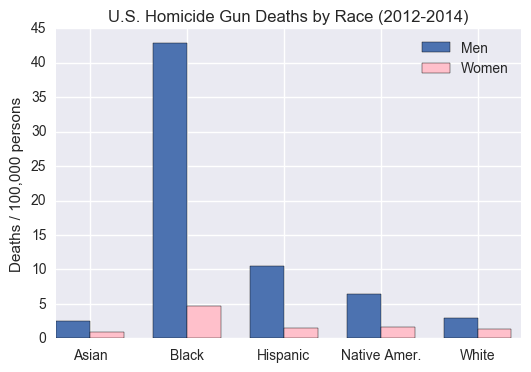

In [130]:
# Let's visualise the table above
multi_index = list(df_sex_race_homicide.index)
female_counts_homicide = []
male_counts_homicide = []
for i, race in enumerate(unique_race):
    female_counts_homicide.append(df_sex_race_homicide.loc[race, "F"].values[0])
    male_counts_homicide.append(df_sex_race_homicide.loc[race, "M"].values[0])

female_counts_homicide_norm = list(pd.Series(female_counts_homicide) * 100000 / pd.Series(race_counts))
male_counts_homicide_norm = list(pd.Series(male_counts_homicide) * 100000 / pd.Series(race_counts))
    
x_vals = pd.Series(range(0, len(unique_race)))
bar_width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x_vals, male_counts_homicide_norm, bar_width)
rects2 = ax.bar(x_vals + bar_width, female_counts_homicide_norm, bar_width, color='pink')
ax.set_xlim(0, 4.8)
ax.set_xticks(x_vals + bar_width)
ax.set_title("U.S. Homicide Gun Deaths by Race ({}-{})".format(min(years), max(years)))
ax.set_xticklabels(['Asian', 'Black', 'Hispanic', 'Native Amer.', 'White'], rotation=0)
ax.legend((rects1[0], rects2[0]), ('Men', 'Women'), loc='upper right')
ax.set_ylabel("Deaths / 100,000 persons")
plt.show()

Let us look at Suicides:

In [131]:
df_sex_race_suicide = cleaned_data[cleaned_data["intent"] == 'Suicide'].groupby(["race", "sex"]).agg({"race": "count"})
df_sex_race_suicide.columns = ["count"]
df_sex_race_suicide

count
race                           sex       
Asian/Pacific Islander         F       99
                               M      646
Black                          F      364
                               M     2967
Hispanic                       F      347
                               M     2822
Native American/Native Alaskan F       62
                               M      492
White                          F     7815
                               M    47548

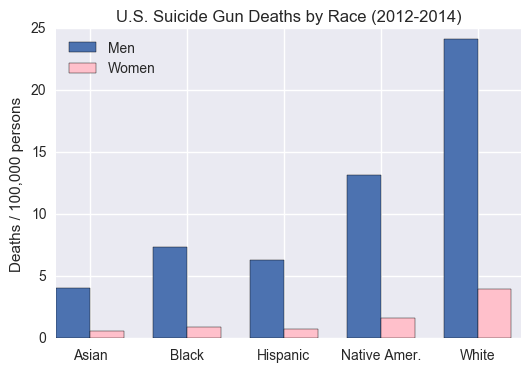

In [133]:
# Let's visualise the table above
multi_index = list(df_sex_race_suicide.index)
female_counts_suicide = []
male_counts_suicide = []
for i, race in enumerate(unique_race):
    female_counts_suicide.append(df_sex_race_suicide.loc[race, "F"].values[0])
    male_counts_suicide.append(df_sex_race_suicide.loc[race, "M"].values[0])

female_counts_suicide_norm = list(pd.Series(female_counts_suicide) * 100000 / pd.Series(race_counts))
male_counts_suicide_norm = list(pd.Series(male_counts_suicide) * 100000 / pd.Series(race_counts))
    
x_vals = pd.Series(range(0, len(unique_race)))
bar_width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x_vals, male_counts_suicide_norm, bar_width)
rects2 = ax.bar(x_vals + bar_width, female_counts_suicide_norm, bar_width, color='pink')
ax.set_xlim(0, 4.8)
ax.set_xticks(x_vals + bar_width)
ax.set_title("U.S. Suicide Gun Deaths by Race ({}-{})".format(min(years), max(years)))
ax.set_xticklabels(['Asian', 'Black', 'Hispanic', 'Native Amer.', 'White'], rotation=0)
ax.legend((rects1[0], rects2[0]), ('Men', 'Women'), loc='upper left')
ax.set_ylabel("Deaths / 100,000 persons")
plt.show()

# Conclusion

In this project we have looked at various aspects of Gun Deaths in the U.S.

We found that amongst the races described in the census, African Americans have the highest Gun Death Rate.

The White group has the second highest Gun Death Rate and the Asian group the lowest.

Furthermore, when we looked at Homicides alone, we found that African Americans suffer the most Gun Deaths due to Homicide. The White group and Asians suffer the least deaths due to homicides.

The white group suffered the most Gun Deaths due to Suicide.

The facets of Gun Death that surfaced in this analysis, perhaps, deserve a pause for thought on which races are the most harmed by the presence of guns.

This is just a learning project. Feedback/criticism/suggestions are welcome.